In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("train.csv")
store=pd.read_excel('store.xlsx')
test=pd.read_csv("test.csv")

In [3]:
print(train.shape)
print(test.shape)
print(store.shape)

(1017209, 9)
(41088, 8)
(1115, 10)


In [7]:
df=train.groupby(by=["Store"]).sum()

In [11]:
df.reset_index()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
0,1,3766,3716854,440523,781,360,193
1,2,3766,3883858,457855,784,360,167
2,3,3766,5408261,584310,779,360,170
3,4,3766,7556507,1036254,784,360,173
4,5,3766,3642818,418588,779,360,172
...,...,...,...,...,...,...,...
1110,1111,3766,4091076,351883,779,360,170
1111,1112,3766,7974294,653276,779,360,170
1112,1113,3766,5196242,562151,784,360,159
1113,1114,3766,16202585,2509542,784,360,169


In [13]:
df.max()

DayOfWeek            3766
Sales            19516842
Customers         3206058
Open                  942
Promo                 360
SchoolHoliday         209
dtype: int64

In [19]:
df[df['Sales']==19516842]

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,,,,,,
262,3766,19516842,3204694,942,360,169


In [20]:
df[df['Customers']==3206058]

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,,,,,,
733,3766,14067158,3206058,942,360,170


In [4]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


In [11]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [13]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [14]:
train.info()
#date col will have to converted to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 62.1+ MB


In [25]:
train['Date'] = pd.to_datetime(train['Date'])

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 66.0+ MB


In [15]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [24]:
train.describe()[['Sales','Customers']]


,Sales,Customers
count,1.017209e+06,1.017209e+06
mean,5.773819e+03,6.331459e+02
std,3.849926e+03,4.644117e+02
min,0.000000e+00,0.000000e+00
25%,3.727000e+03,4.050000e+02
50%,5.744000e+03,6.090000e+02
75%,7.856000e+03,8.370000e+02
max,4.155100e+04,7.388000e+03


In [19]:
train.DayOfWeek.value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

In [16]:
train.describe()[['Sales','Customers']].loc['min']

Sales        0.0
Customers    0.0
Name: min, dtype: float64

In [17]:
train.describe()[['Sales','Customers']].loc['max']

Sales        41551.0
Customers     7388.0
Name: max, dtype: float64

In [18]:
# no. of stores
train.Store.nunique()

#There is a total of 1115 Stores all across

1115

In [25]:
train.DayOfWeek.value_counts().sort_values()

7    144730
6    144730
1    144730
2    145664
3    145665
5    145845
4    145845
Name: DayOfWeek, dtype: int64

In [28]:
print(train.Open.value_counts())
print(train.Promo.value_counts())

1    844392
0    172817
Name: Open, dtype: int64
0    629129
1    388080
Name: Promo, dtype: int64


In [21]:
train.isna().sum()
#no missing values in train dataset

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [22]:
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

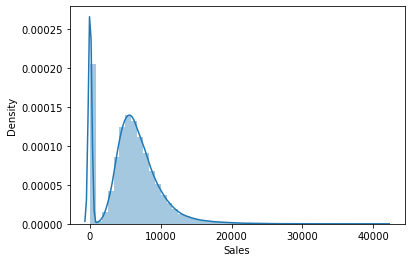

In [35]:
sns.distplot(train.Sales)
plt.show()

#The sales are 0 for many records, which might be because the stores are closed

In [37]:
print ()
print ("-Over those two years, {} is the number of times different stores were closed on given days.".format(train[(train.Open == 0)].count()[0]))
print ()
print ("-From those closed events, {} times occured because there was a school holiday. " .format(train[(train.Open == 0) & (train.SchoolHoliday == 1)&(train.StateHoliday == '0') ].count()[0]))
print ()
print ("-And {} times it occured because of either a bank holiday or easter or christmas.".format(train[(train.Open == 0) &
         ((train.StateHoliday == 'a') |
          (train.StateHoliday == 'b') | 
          (train.StateHoliday == 'c'))].count()[0]))
print ()
print ("-But interestingly enough, {} times those shops closed on days for no apparent reason when no holiday was announced. In fact, those closings were done with no pattern whatsoever and in this case from 2013 to 2015 at almost any month and any day.".format(train[(train.Open == 0) &
         (train.StateHoliday == "0")
         &(train.SchoolHoliday == 0)].count()[0]))
print ()


-Over those two years, 172817 is the number of times different stores were closed on given days.

-From those closed events, 2263 times occured because there was a school holiday. 

-And 30140 times it occured because of either a bank holiday or easter or christmas.

-But interestingly enough, 121482 times those shops closed on days for no apparent reason when no holiday was announced. In fact, those closings were done with no pattern whatsoever and in this case from 2013 to 2015 at almost any month and any day.



In [19]:
train.DayOfWeek.value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

#### Exploring a Particular Store

In [21]:
# Store 262 Analysis, as it has highest sales
store1 = train[train['Store']==262]
store1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
261,262,5,31-07-2015,25774,3669,1,1,0,1
1376,262,4,30-07-2015,22253,3132,1,1,0,1
2491,262,3,29-07-2015,21041,3123,1,1,0,1
3606,262,2,28-07-2015,22442,3143,1,1,0,1
4721,262,1,27-07-2015,22185,3150,1,1,0,1


In [22]:
store1.shape

(942, 9)

In [23]:
store1['Date'] = pd.to_datetime(store1['Date'])
print(min(store1['Date']))
print(max(store1['Date']))
store1['Year'] = store1['Date'].dt.year
store1['Month'] = store1['Date'].dt.month

#The data for Store 1 is available from 2013-01-01 to 2015-07-31

2013-01-01 00:00:00
2015-12-07 00:00:00


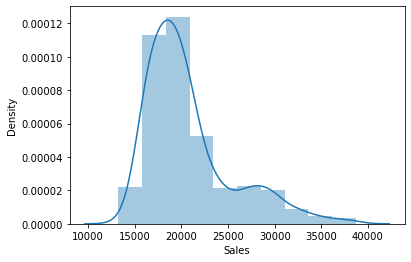

In [24]:
import seaborn as sns
sns.distplot(store1.Sales , bins=10)
plt.show()

In [27]:
#Store 733, which has highest customers
store_cust = train[train['Store']==733]
store_cust.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
732,733,5,2015-07-31,16625,3644,1,1,0,1
1847,733,4,2015-07-30,14531,3145,1,1,0,1
2962,733,3,2015-07-29,14145,3184,1,1,0,1
4077,733,2,2015-07-28,14433,3148,1,1,0,1
5192,733,1,2015-07-27,15907,3282,1,1,0,1


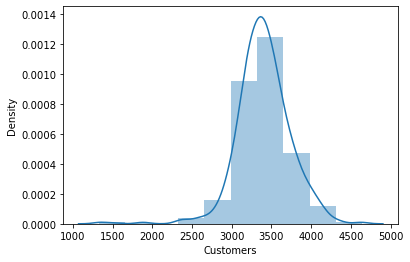

In [28]:
import seaborn as sns
sns.distplot(store_cust.Customers , bins=10)
plt.show()

In [29]:
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].fillna(0)
#store['Promo2SinceYear'] = store['Promo2SinceYear'].fillna(store['Promo2SinceYear'].mode().iloc[0])
#store['PromoInterval'] = store['PromoInterval'].fillna(store['PromoInterval'].mode().iloc[0])
store['Promo2SinceYear'] = store['Promo2SinceYear'].fillna(0)
store['PromoInterval'] = store['PromoInterval'].fillna(0)

store['CompetitionDistance'] = store['CompetitionDistance'].fillna(store['CompetitionDistance'].max())
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mode().iloc[0])
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mode().iloc[0])

In [ ]:
#Merging both the Dataframes based on the "Store" ID
df=store.merge(train,on=["Store"],how="inner")
df.head()

In [ ]:
df=df.drop(df[(df.Sales == 0)].index)

In [7]:
train['SalesPerCustomer'] = train['Sales']/train['Customers']
train['SalesPerCustomer'].head()

0          NaN
1     9.702400
2    10.126675
3     9.342457
4     8.626118
Name: SalesPerCustomer, dtype: float64

In [8]:
missing = train.isnull().sum()
missing.sort_values(ascending=False)

Unnamed: 9          1017208
SalesPerCustomer     172869
SchoolHoliday             0
StateHoliday              0
Promo                     0
Open                      0
Customers                 0
Sales                     0
Date                      0
DayOfWeek                 0
Store                     0
dtype: int64

In [9]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
store.shape

(1115, 10)

In [11]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [12]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].mean(), inplace = True)

In [13]:
train1= train.merge(right=store, on='Store', how='left')

In [17]:
train1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Unnamed: 9,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,2013-01-01,0,0,0,0,a,1,NaN,NaN,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,NaN,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,NaN,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,NaN,9.342457,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,NaN,8.626118,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [19]:
#indexing the data
train1=train1.set_index('Year_month_day_time')

KeyError: "None of ['Year_month_day_time'] are in the columns"

<AxesSubplot:>

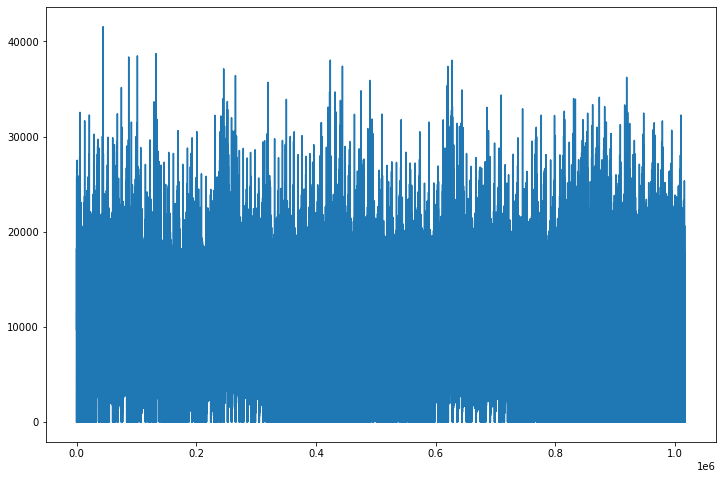

In [18]:
train1['Sales'].plot(figsize=(12,8))

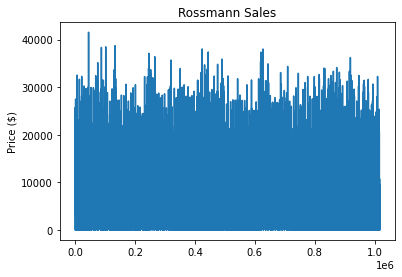

In [15]:
plt.plot(train.index, train['Sales'])
plt.title('Rossmann Sales')
plt.ylabel('Price ($)');
plt.show()

## Promo

<AxesSubplot:title={'center':'Promo vs.Customers'}, xlabel='Promo', ylabel='Customers'>

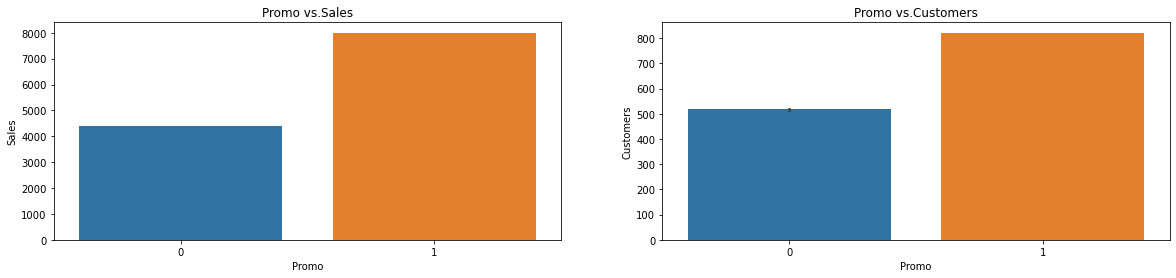

In [16]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,4))

axis1.title.set_text('Promo vs.Sales')
axis2.title.set_text('Promo vs.Customers')
sns.barplot(x='Promo', y='Sales', data=train, ax=axis1)
sns.barplot(x='Promo', y='Customers', data=train, ax=axis2)